# EE 298 Machine Learning
### Submitted by Edwin Klein Balila
<br>Assignment #1<br>


In [268]:
import numpy as np
import matplotlib.pyplot as plt
import math

### 1. Generate a 16×16 − dim position encoding using an interweaved sin(.) and cos(.) functions: 𝑩 = {𝒃1, 𝒃2,,…, 𝒃16} where 𝒃i ∈ ℝ^16. Distribute the domain of 8-dim between 0 to 2𝜋.

In [290]:
# Code is based from https://www.tensorflow.org/tutorials/text/transformer

def positional_encoding(position, d_model):

    # distributing domain 0 to 2pi. dividing by 8
    X = np.linspace((1/4)*math.pi, (2)*math.pi, num=8)/position
    X = np.repeat(X, 2)[np.newaxis, :]
    X = np.arange(position)[:,np.newaxis] * X
 
    pos_encoding = np.zeros((position,d_model))

    # apply sin to even indices in the array; 2i
    pos_encoding[:, 0::2] = np.sin(X[:, 0::2])
      
    # apply cos to odd indices in the array; 2i+1
    pos_encoding[:, 1::2] = np.cos(X[:, 1::2])
        
    pos_encoding = pos_encoding[np.newaxis, ...]
        
    return pos_encoding

tokens = 16
dimensions = 16

pos_encoding = positional_encoding(tokens, dimensions)
print (pos_encoding.shape)

(1, 16, 16)


## 2. If 𝑩 is a set of basis vectors, are the vectors orthogonal? Orthonomal? If not, make the basis vectors orthogonal and orthonormal using G-S method.

In [335]:
# code is based from https://www.math.uci.edu/~ttrogdon/105A/html/Lecture23.html

# Classical Gram-Schmidt Orthogonalization

def GScoef(v2, v1):
    return np.dot(v2,v1)/np.dot(v1,v1)

def Normalize(x):
    return x/np.linalg.norm(x)

def gs(X):
    Y = []
    for i in range(len(X)):
        Tvector = X[i]
        for b in X:
            project_vec = GScoef(X[i], b) * b
            Tvector = Tvector - project_vec
        Y.append(Normalize(Tvector))
    return np.vstack(Y)


It turns out that classical gram-schmidt orthogonalization is unstable numerically due to accumulated round off errors.


In [336]:
# code is based from https://www.math.uci.edu/~ttrogdon/105A/html/Lecture23.html

# Modified Gram-Schmidt Orthogonalization

def GScoef(v2, v1):
    return np.dot(v2,v1)/np.dot(v1,v1)

def Normalize(x):
    return x/np.linalg.norm(x)

def modifiedgs(X):

    Tvector = []
    TNorm = []

    for j in range(len(X)):
        Tvector.append(X[j])

    for j in range(len(X)):
        TNorm.append(Normalize(Tvector[j]))

        for k in range(j+1, len(X)):
            project_vec = GScoef(Tvector[k], TNorm[j]) * TNorm[j]
            Tvector[k] = Tvector[k] - project_vec

    return np.vstack(TNorm)

Define Functions Orthogonal, Normal and Orthonormal

In [337]:
def orthogonaltest(X):
    
    V = np.matmul(X,X.T)
    V = np.round(V)
    #print(V)
    
    #check if X*X.T is an identity.
    return (V==np.eye(len(X))).all()

def normaltest(X):
    for i in range(X.shape[0]):
        norm = np.dot(X[i] , X[i])
        #norm = round(norm)
        #print(norm)
        
        #checks if norm is 1
        if np.isclose(norm, 1.):
            return True
    return False

def orthonormaltest(X):
    if orthogonaltest(X) & normtest(X):
        return True
    return False
    

Checks if Orthogonal, Normalize and Orthonormal

In [338]:
print("Basis Vectors are Orthogonal: ", orthogonaltest(pos_encoding[0]))
print("Basis Vectors are Normalized: ", normaltest(pos_encoding[0]))
print("Basis Vectors are Orthonormal: ", orthonormaltest(pos_encoding[0]))

Basis Vectors are Orthogonal:  False
Basis Vectors are Normalized:  False
Basis Vectors are Orthonormal:  False


Make the Basis Vectors Orthogonal and OrthoNormal using Modified Gram-Schmidt Method. Check if Orthogonal, Normalize and Orthonormal

In [339]:
new = modifiedgs(pos_encoding[0])
print("Basis Vectors are Orthogonal: ", orthogonality(new))
print("Basis Vectors are Normalized: ", normaltest(new))
print("Basis Vectors are Orthonormal: ", orthonormaltest(new))

Basis Vectors are Orthogonal:  True
Basis Vectors are Normalized:  True
Basis Vectors are Orthonormal:  True


## 3. Colored Visualization of vectors

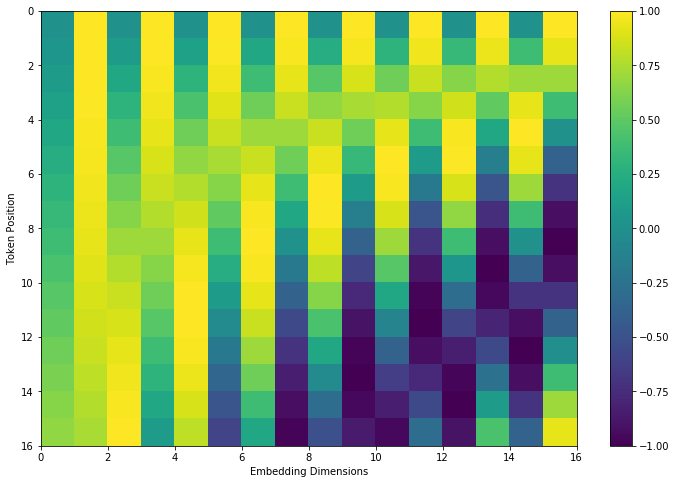

In [340]:
plt.figure(figsize=(12,8))
plt.pcolormesh(pos_encoding[0], cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, dimensions))
plt.ylim((tokens,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()

Orthonormal Positional Encoding

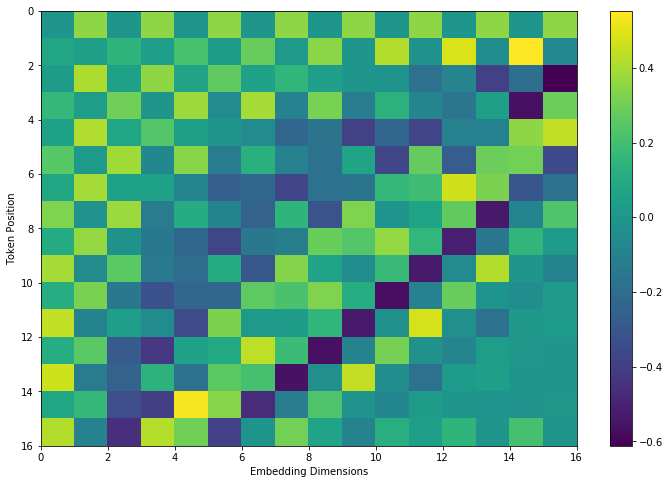

In [341]:
plt.figure(figsize=(12,8))
plt.pcolormesh(new, cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, 16))
plt.ylim((16,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()